#  Predicting Car Prices

In this guided project, machine learning used to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set here and can download it directly from here. Here's a preview of the data set:

In [23]:
import pandas as pd
import numpy as np
#from sklearn-neighbors import KNeighborRegressor

pd.options.display.max_columns = 100
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names = cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
# Features with continues values are ideal candidates 
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [25]:
# Replace '?' with nan
numeric_cars = numeric_cars .copy()
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [28]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [29]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [30]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [31]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [32]:
def normalizer (df):
    return (df-df.min())/(df.max()-df.min())

input_data = numeric_cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg']]
target = numeric_cars['price']

input_data = input_data.apply(normalizer)
input_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


# Train Univariate Model

In [54]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col,df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    # Shuffle data  
   # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [55]:
col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg']
rmse_all = {}
for c in col:
    mse = knn_train_test(c, 'price', numeric_cars)
    rmse_all[c] = mse
print(rmse_all)

{'normalized-losses': 7339.675755133537, 'wheel-base': 5460.851458362242, 'length': 5428.810101415201, 'width': 4772.459149439554, 'height': 8073.1197593196175, 'curb-weight': 4445.141920375235, 'bore': 6795.388311535586, 'stroke': 7954.3010342434445, 'compression-rate': 6610.812153159129, 'horsepower': 4048.4377247389034, 'peak-rpm': 7649.170564081823, 'city-mpg': 4760.44984187731, 'highway-mpg': 4643.046277675214}


In [56]:
# Best performing feature
min(rmse_all, key=rmse_all.get)

'horsepower'

In [58]:
# Create pd series for rmse
rmse_pd = pd.Series(rmse_all)
rmse_pd.sort_values()

horsepower           4048.437725
curb-weight          4445.141920
highway-mpg          4643.046278
city-mpg             4760.449842
width                4772.459149
length               5428.810101
wheel-base           5460.851458
compression-rate     6610.812153
bore                 6795.388312
normalized-losses    7339.675755
peak-rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

In [85]:
# Optimize k
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results     

{'normalized-losses': {1: 7836.7752643899685,
  3: 7516.084828453897,
  5: 7339.675755133537,
  7: 7759.126829130677,
  9: 7794.746366502435},
 'wheel-base': {1: 4493.734068810494,
  3: 5208.39331165465,
  5: 5460.851458362242,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4611.990241761035,
  3: 5129.672039752984,
  5: 5428.810101415201,
  7: 5311.9103449731665,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4595.4858709976525,
  5: 4772.459149439554,
  7: 4715.918441236321,
  9: 4730.373071846554},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 8073.1197593196175,
  7: 7693.302663098179,
  9: 7776.396862418894},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4445.141920375235,
  7: 4330.608104418053,
  9: 4632.92525121302},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6795.388311535586,
  7: 6896.559499627726,
  9: 6882.822815090022},
 'stroke': {1: 9043.351317377035,
  3: 7247.307977352132,
  5: 7

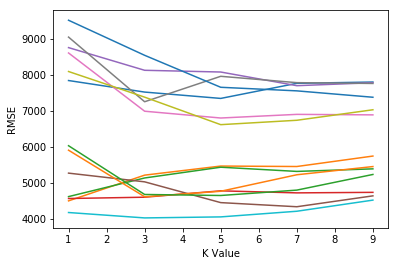

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
for k, v in k_rmse_results.items():
    
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('K Value')
    plt.ylabel('RMSE')
    

# Multivariate Model

In [102]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()


horsepower           4191.699237
width                4674.698766
curb-weight          4739.056704
highway-mpg          5071.970954
length               5173.087449
city-mpg             5187.089230
wheel-base           5269.898315
compression-rate     7166.073599
bore                 7232.319720
normalized-losses    7649.281809
stroke               7955.585214
height               8083.028879
peak-rpm             8124.022815
dtype: float64

In [103]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'two best features': {5: 3800.4843868972157},
 'three best features': {5: 4009.975326261712},
 'four best features': {5: 4010.4497757189724},
 'five best features': {5: 4010.545922593048},
 'six best features': {5: 4005.179084808336}}

In [112]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'three best features': {1: 4515.853175313619,
  2: 4319.835091507751,
  3: 3981.2517774026182,
  4: 4081.04766703889,
  5: 4009.975326261712,
  6: 3985.1368115838513,
  7: 4093.056621668392,
  8: 4239.412195567124,
  9: 4479.925415058108,
  10: 4479.009463614529,
  11: 4645.227330476332,
  12: 4707.8032036098475,
  13: 4846.593441812112,
  14: 4929.192715688816,
  15: 4961.781436862644,
  16: 4968.404853461746,
  17: 5027.861069260901,
  18: 5109.6900898693675,
  19: 5127.635530559191,
  20: 5196.747817959358,
  21: 5195.595321900119,
  22: 5153.537760760005,
  23: 5211.6620542314295,
  24: 5208.228229456007},
 'four best features': {1: 4516.337252488771,
  2: 4319.991335192539,
  3: 3980.1625695828093,
  4: 4082.4237203589614,
  5: 4010.4497757189724,
  6: 3986.886120535525,
  7: 4093.056621668392,
  8: 4238.534846513756,
  9: 4484.702837182365,
  10: 4478.98496533567,
  11: 4645.8214443615125,
  12: 4712.928993467835,
  13: 4846.28781744001,
  14: 4929.191594537765,
  15: 4961.84631

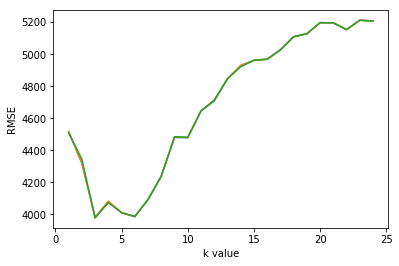

In [114]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')